In [2]:
import threading
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
import scipy.signal
%matplotlib inline
from vizdoom import *

from random import choice
from time import sleep
from time import time

import numpy as np

In [4]:
"""
Here we create our environment
"""
def create_environment():
    game = DoomGame()
    
    # Load the correct configuration
    game.load_config("scenarios/defend_the_line.cfg")
    
    # Load the correct scenario (in our case deadly_corridor scenario)
    game.set_doom_scenario_path("scenarios/defend_the_line.wad")
    
    game.init()

    # Here we create an hot encoded version of our actions (5 possible actions)
    # possible_actions = [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0]...]
    possible_actions = np.identity(7,dtype=int).tolist()
    
    return game, possible_actions

In [63]:
def process_frame(frame):
    #s = frame[60:-35,:] # yhaut, ybas, xgauche, xdroite
    s = frame[40:-32,1:-1] #30,-35,20,-20 #(30,-35,20,-20)
    #s = frame[30:-35,20:-20]
    #s = scipy.misc.imresize(s,[240,320])
    #s = np.reshape(s,[np.prod(s.shape)]) / 255.0
    return s

In [36]:
game, possible_actions = create_environment()

In [37]:
myim = game.get_state().screen_buffer

In [38]:
myim.shape

(240, 320)

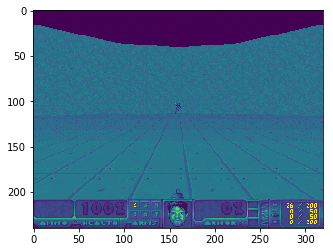

In [39]:
plt.imshow(myim)

In [64]:
myim_p=process_frame(myim)

In [67]:
myim_p.shape

(168, 318)

In [69]:
84*318/168

159.0

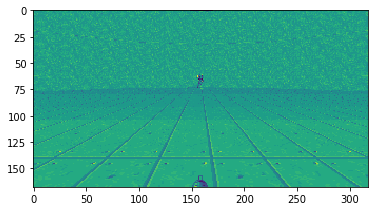

In [66]:
plt.imshow(myim_p)

In [16]:
100*318/175

181.71428571428572

In [70]:
game.close()